In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
#create discrete 2D domain
N = 100
x_start, x_end = -1.0, 1.0
y_start, y_end = -1.5, 1.5
x = numpy.linspace(x_start, x_end, N)
y = numpy.linspace(y_start, y_end, N)
X, Y = numpy.meshgrid(x, y)

In [3]:
u_inf = 1.0
u_free = u_inf * numpy.ones((N, N), dtype=float)
v_free = numpy.zeros((N, N), dtype=float)
psi_free = u_inf * Y

In [4]:
class Source:
    def __init__(self, sigma, x, y):
        self.sigma = sigma
        self.x = x
        self.y = y

    def velocity(self, X, Y):
        r2 = (X - self.x)**2 + (Y - self.y)**2
        u = self.sigma / (2 * numpy.pi) * (X - self.x) / r2
        v = self.sigma / (2 * numpy.pi) * (Y - self.y) / r2
        return u, v
    def stream(self, X, Y):
        psi = self.sigma / (2 * numpy.pi) * numpy.arctan((Y - self.y) / (X - self.x))
        return psi

In [5]:
sigma = 5.0
xs, ys, = -0.1, 0.0
s1 = Source(sigma, xs, ys)
print(type(s1))
velocity = s1.velocity(X, Y)
print(type(velocity))

<class '__main__.Source'>
<class 'tuple'>


In [6]:
Ns = 21
total_sigma = 4.5
sigma = total_sigma / Ns
x_sources = numpy.zeros(Ns)
y_sources = numpy.linspace(-1.0, 1.0, num=Ns)

sources = numpy.empty(Ns, dtype=object)
print(type(sources))
print(sources.dtype)

<class 'numpy.ndarray'>
object


In [7]:
for i in range(Ns):
    sources[i] = Source(sigma, x_sources[i], y_sources[i])
    
u = u_free.copy()
v = v_free.copy()
psi = psi_free.copy()
for source in sources:
    u_s, v_s = source.velocity(X, Y)
    u += u_s
    v += v_s
    psi_s = source.stream(X, Y)
    psi += psi_s

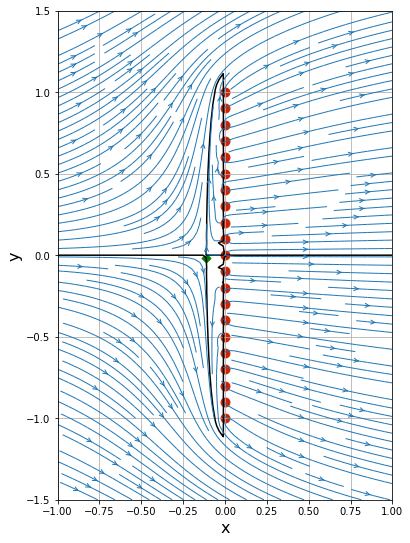

In [8]:
width = 6
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.contour(X, Y, psi, levels=[0.0], colors='black')
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_sources, y_sources, color='#CD2305', s=80, marker='o')
magnitude = numpy.sqrt(u**2 + v**2)
j_stagn, i_stagn = numpy.unravel_index(magnitude.argmin(), magnitude.shape)
pyplot.scatter(x[i_stagn], y[j_stagn], color='green', s=40, marker='D')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end);

In [9]:
from scipy import integrate

In [10]:
integrate.quad(lambda x : x**2, 0.0, 1.0)

(0.33333333333333337, 3.700743415417189e-15)

In [11]:
integrate.quad(lambda x, a1, a2: a1 * a2 * x**2, 0.0, 1.0, args=(2.0, 3.0))

(2.0, 2.220446049250313e-14)

In [14]:
sigma = 2
ymin, ymax = -1.0, 1.0

integrand_u = lambda s, x, y: x / (x**2 + (y-s)**2)
integrand_v = lambda s, x, y: (y-s) / ((x**2) + (y-s)**2)

def integration(x, y, integrand):
    return integrate.quad(integrand, ymin, ymax, args=(x, y))[0]

vec_integration = numpy.vectorize(integration)

u_sheet = sigma / (2 * numpy.pi) * vec_integration(X, Y, integrand_u)
v_sheet = sigma / (2 * numpy.pi) * vec_integration(X, Y, integrand_v)

u = u_free + u_sheet
v = v_free + v_sheet

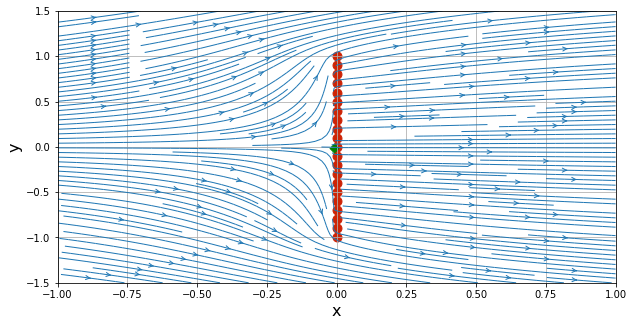

In [15]:
width = 10
height = 5
pyplot.figure(figsize=(width,height))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_sources, y_sources, color='#CD2305', s=80, marker='o')
magnitude = numpy.sqrt(u**2 + v**2)
j_stagn, i_stagn = numpy.unravel_index(magnitude.argmin(), magnitude.shape)
pyplot.scatter(x[i_stagn], y[j_stagn], color='green', s=40, marker='D')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end);